# Pages2kv2 proxy locations: 
  
Katie Brennan   
Started January 2021

In [1]:
import sys,os,copy
#sys.path.append("/Users/hakim/gitwork/LMR_python3")

import sys
import numpy as np
import pickle

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

from time import time
from spharm import Spharmt, getspecindx, regrid
from netCDF4 import Dataset
from scipy import stats

In [2]:
sys.path.insert(1,'/home/disk/kalman2/mkb22/LMR_lite/')
import LMR_lite_utils as LMRlite

Loading information from datasets.yml
Loading information from grid_def.yml


In [3]:
def load_recon_grid(): 
    lalo_dir = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/'
    lalo_savename = '20CR_grid.pkl'

    grid = pickle.load(open(lalo_dir+lalo_savename,'rb'))
    
    return grid

def sub_arctic_plot(fig,ax,VAR1,LAT,LON,TITLE1,MAX1,fontsize,colorbar=True,extent=True):
    var1, lon1 = add_cyclic_point(VAR1, coord=LON)
    new_lon2d, new_lat2d = np.meshgrid(lon1, LAT)
    if extent is True: 
        ax.set_extent([-150, 140, 50, 90], crs=ccrs.PlateCarree())
    ax.gridlines(linestyle='--')
    ax.add_feature(cfeature.LAND, facecolor=(1, 1, 1))
    cs = ax.pcolormesh(new_lon2d, new_lat2d, var1, 
                       vmin=-MAX1, vmax=MAX1, cmap=plt.cm.bwr, 
                       transform=ccrs.PlateCarree())
    ax.coastlines(resolution='110m', linewidth=0.5)
    if colorbar is True:
        plt.colorbar(cs, ax=ax)
    ax.set_title(TITLE1,fontsize=fontsize)

In [4]:
proj = dict(projection=ccrs.Stereographic(central_latitude=90,
                                          central_longitude=-45,
                                          true_scale_latitude=0.1))

In [5]:
plt.rcParams['figure.dpi']=300

In [6]:
grid= load_recon_grid()

In [7]:
cfile = '/home/disk/kalman2/mkb22/LMR_lite/configs/config_ccsm4_brennan2020.yml'
cfile_fixed = '/home/disk/kalman2/mkb22/LMR_lite/configs/config_ccsm4_fixedprox.yml'

print('loading configuration...')
#cfg = None
cfg = LMRlite.load_config(cfile)
cfg_fixed = LMRlite.load_config(cfile_fixed)

loading configuration...
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!
Checking configuration ... 
OK!


In [8]:
prox_manager_fixed = LMRlite.load_proxies(cfg_fixed[0])

                               Ice Cores_d18O :    15
                                 Ice Cores_dD :     2
                             Lake Cores_Varve :     4
                       Tree Rings_WidthPages2 :    71
                       Tree Rings_WoodDensity :     9
                                        TOTAL :   101
-----------------------------------------------------
completed in 3.46162486076355 seconds
-----------------------------------------------------


In [9]:
prox_manager = LMRlite.load_proxies(cfg[0])

                                 Bivalve_d18O :     1
               Corals and Sclerosponges_Rates :     8
                Corals and Sclerosponges_SrCa :    20
                Corals and Sclerosponges_d18O :    49
                        Ice Cores_MeltFeature :     1
                               Ice Cores_d18O :    17
                                 Ice Cores_dD :     5
                              Lake Cores_Misc :     1
                             Lake Cores_Varve :     4
                       Tree Rings_WidthPages2 :   258
                       Tree Rings_WoodDensity :    41
                                        TOTAL :   405
-----------------------------------------------------
completed in 2.128183364868164 seconds
-----------------------------------------------------


In [10]:
for proxy_idx, Y in enumerate(prox_manager.sites_assim_proxy_objs()):
    print(Y.psm_obj.R)

0.07401781909069646
0.05917015433484852
0.06361209152089177
0.10824443635892979
0.031494144208834604
0.12264914272913596
0.08258652550686126
0.02379598064112744
0.18713087876086337
0.042931828507488036
0.5814210652890447
0.019302611040414048
0.026258896004886883
0.07691847352009645
0.1794657524113462
0.03301443764545719
0.0774701216660992
0.018654119235337822
0.029293905956388342
0.0012620174096301304
0.040720491213497766
0.025536878457800838
0.1269729579234452
0.07453967938186486
0.05558962870478201
0.04915990869027689
0.1570952951786563
0.05015599551858498
0.05508907432183716
0.047918379107763615
0.06726407166420742
0.044971166698345985
0.05818754830368419
0.021666210871830977
0.12852629588052272
0.036359479317096495
0.08863316762068403
0.061858561005447926
0.05612628776048694
0.13006173973466703
0.0653482570906862
0.22750200742406015
0.0010768842746272384
0.5388426232227952
0.09458753717273659
0.07563677175599912
0.13979300131254777
0.0013309461365502168
0.09799567332228781
0.080330

In [11]:
prox_info = {'Tree Rings_WidthPages2':{'color':'g','label':'Tree Rings-WidthPages2'},
             'Tree Rings_WidthBreit':{'color':'lawngreen','label':'Tree Rings-WidthBreit'}, 
             'Tree Rings_WoodDensity':{'color':'yellowgreen','label':'Tree Rings-WoodDensity'}, 
             'Tree Rings_Isotopes':{'color':'olivedrab','label':'Tree Rings-Isotopes'}, 
             'Corals and Sclerosponges_d18O':{'color':'lightcoral','label':'Corals and Sclerosponges-d18O'},
             'Corals and Sclerosponges_SrCa':{'color':'firebrick','label':'Corals and Sclerosponges-SrCa'}, 
             'Corals and Sclerosponges_Rates':{'color':'orangered','label':'Corals and Sclerosponges-Rates'}, 
             'Ice Cores_d18O':{'color':'lightskyblue','label':'Ice Cores-d18O'}, 
             'Ice Cores_dD':{'color':'aqua','label':'Ice Cores-dD'}, 
             'Ice Cores_Accumulation':{'color':'dodgerblue','label':'Ice Cores-Accumulation'}, 
             'Lake Cores_Varve':{'color':'saddlebrown','label':'Lake Cores-Varve'}, 
             'Lake Cores_Misc':{'color':'goldenrod','label':'Lake Cores-Misc'}, 
             'Bivalve_d18O':{'color':'darkorchid','label':'Bivalve-d18O'}}

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


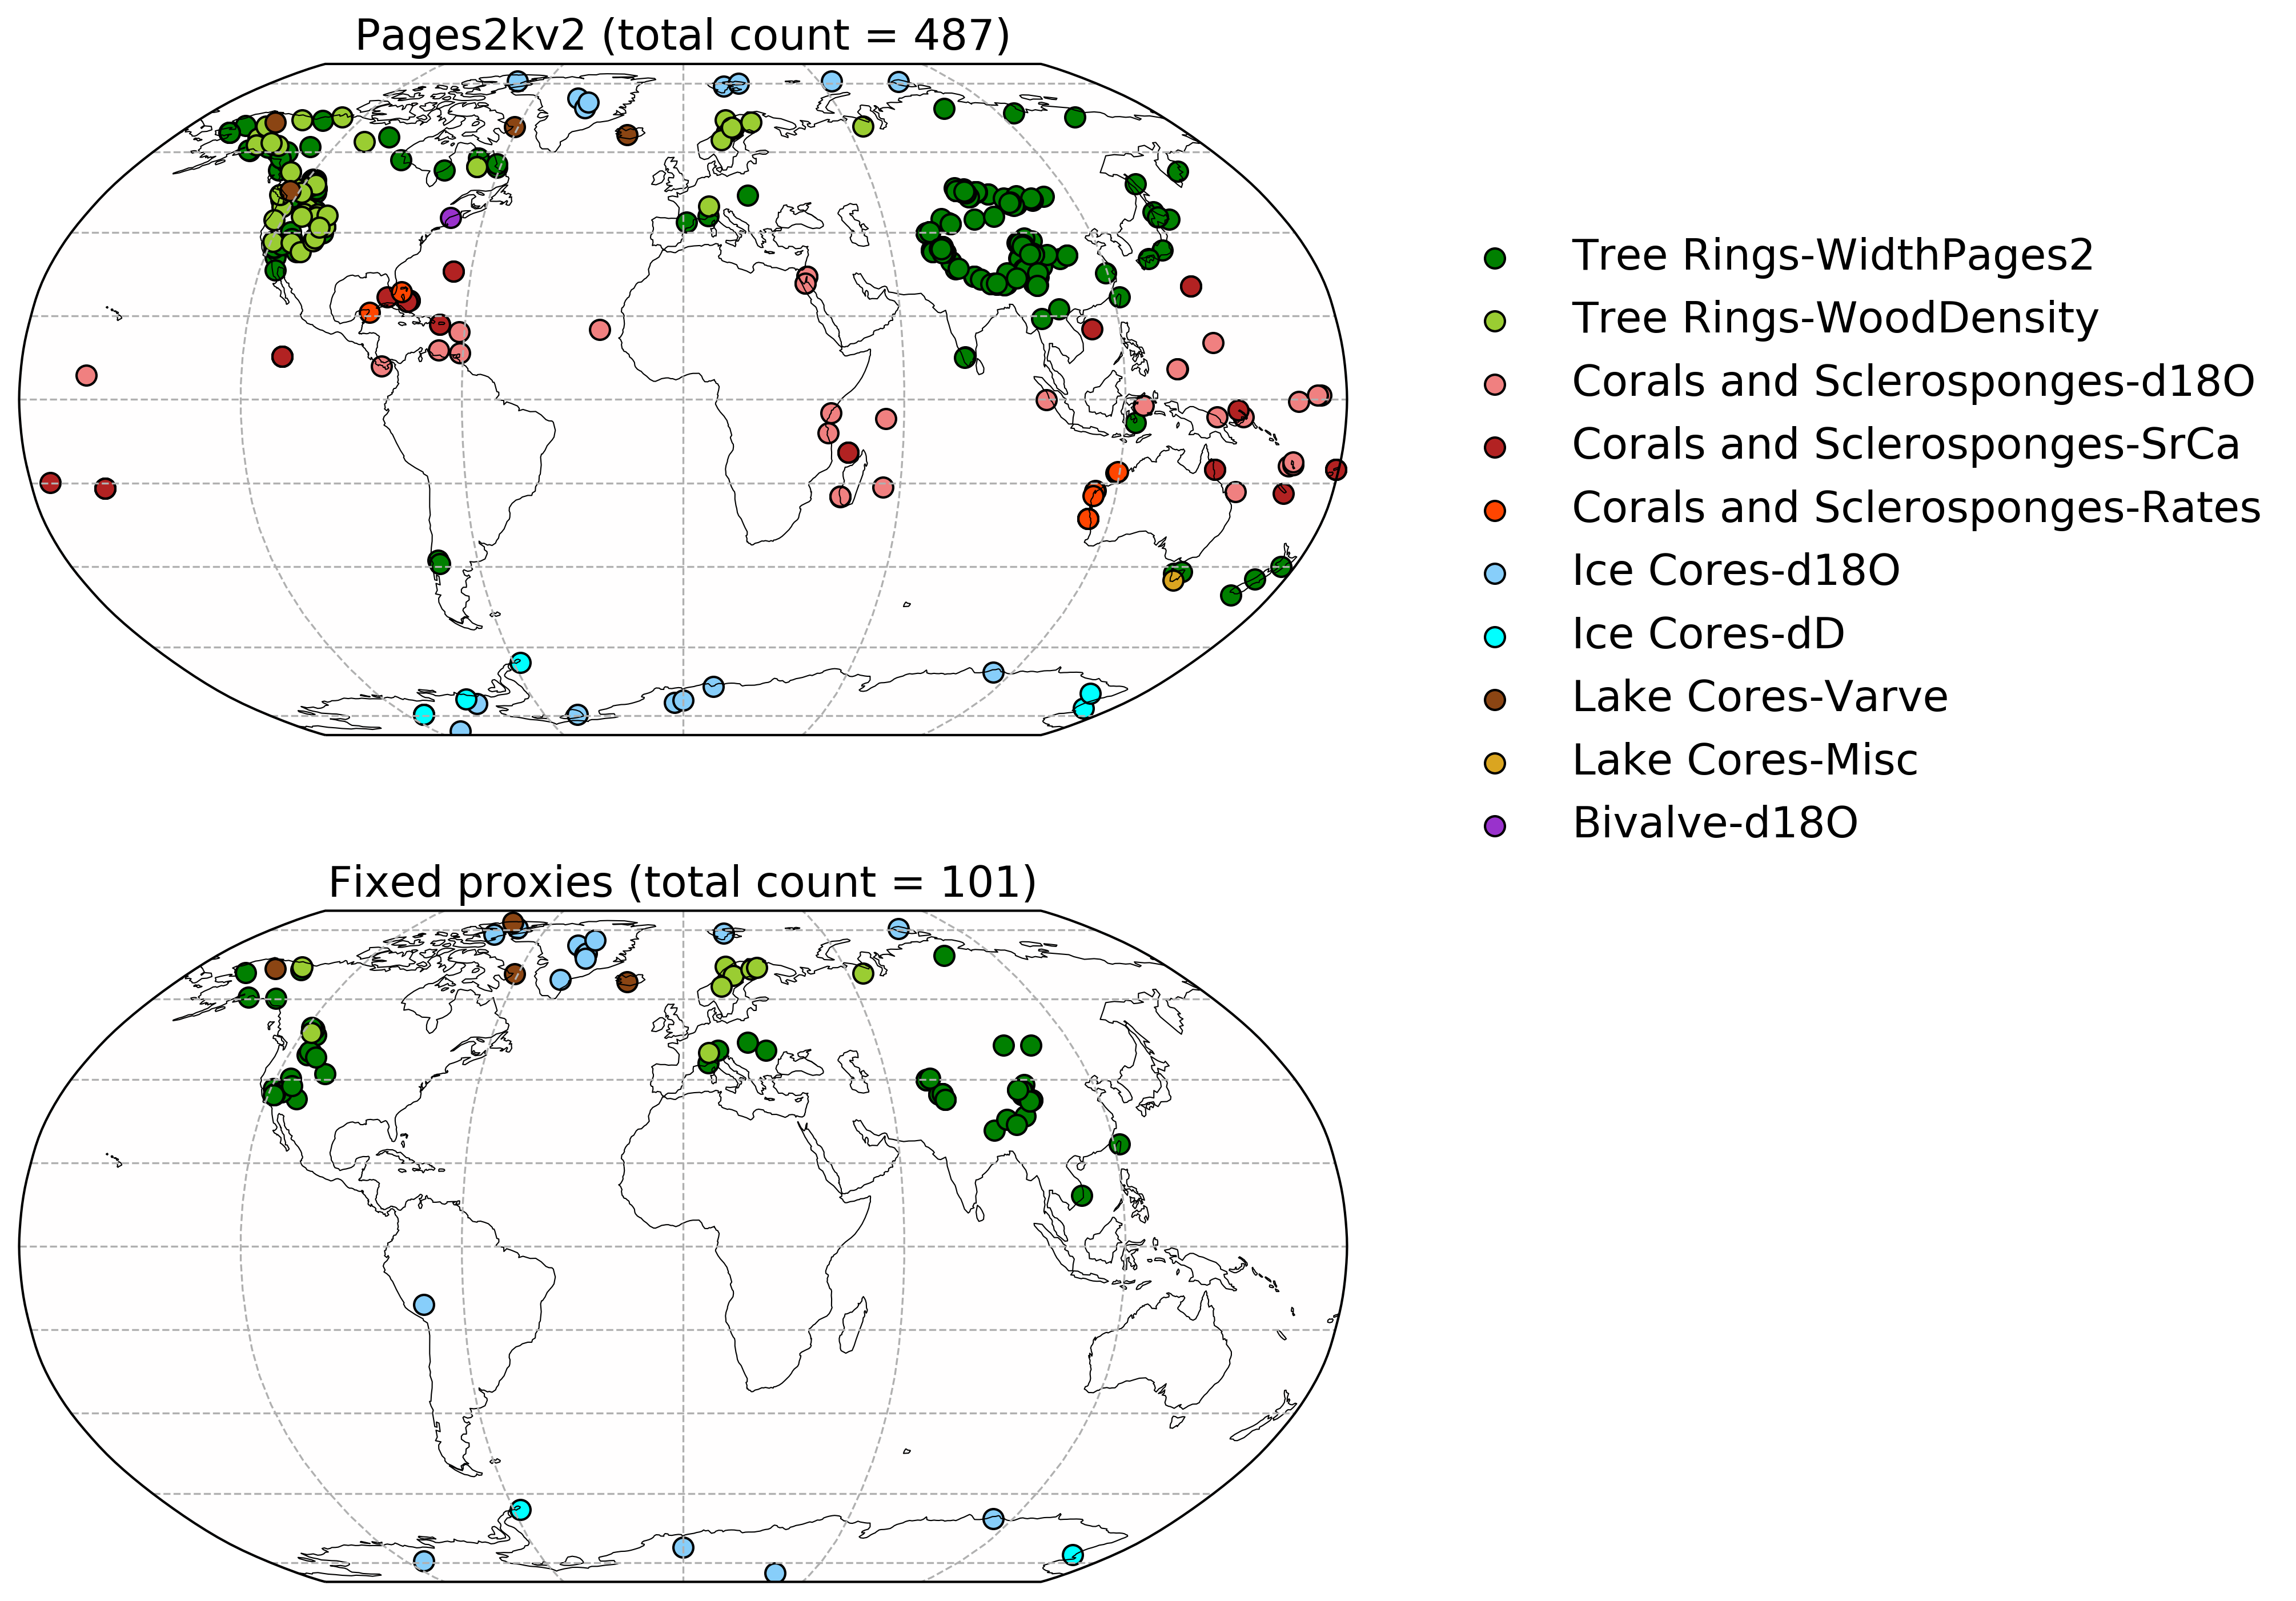

In [12]:
# Plot assimilated proxies: Global 

handle_list = []
label_list = []

fig,ax = plt.subplots(2,1, figsize=(10,12), subplot_kw = dict(projection=ccrs.Robinson()))
ax=ax.flatten()
sub_arctic_plot(fig,ax[0],np.zeros((grid.nlat,grid.nlon)),
                grid.lat[:,0],grid.lon[0,:],
                'Pages2kv2 (total count = 487)',1,18,
                colorbar=False, extent=False)
for proxy_idx, Y in enumerate(prox_manager.sites_assim_proxy_objs()):
    if 'Ice Cores_MeltFeature' in Y.type:
        continue 
    else:
        ax[0].scatter(Y.lon,Y.lat,color=prox_info[Y.type]['color'],transform=ccrs.PlateCarree(), 
                       label=prox_info[Y.type]['label'], edgecolors='k',s=70)
        
sub_arctic_plot(fig,ax[1],np.zeros((grid.nlat,grid.nlon)),
                grid.lat[:,0],grid.lon[0,:],
                'Fixed proxies (total count = 101)',1,18,
                colorbar=False, extent=False)
        
for proxy_idx, Y in enumerate(prox_manager_fixed.sites_assim_proxy_objs()):
    if 'Ice Cores_MeltFeature' in Y.type:
        continue 
    else:
        ax[1].scatter(Y.lon,Y.lat,color=prox_info[Y.type]['color'],transform=ccrs.PlateCarree(), 
                       label=prox_info[Y.type]['label'], edgecolors='k',s=70)

handles, labels = ax[0].get_legend_handles_labels()
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
ax[0].legend(handle_list,label_list,bbox_to_anchor=(1.05, 0.8),fontsize=18, frameon=False)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'proxy_locations_pages2k_fixed.png'
#plt.savefig(savedir+savename, bbox_inches='tight')